In [308]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns

from sklearn.metrics import homogeneity_score,completeness_score,classification_report,confusion_matrix,mean_squared_error,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder,PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


pd.set_option('display.max_rows', 1300)
pd.set_option('display.max_columns', 1300)
pd.set_option('display.width', 1300)

In [309]:
# prepare data

# loop thr
trainData = pd.read_csv('CS98XRegressionTrain.csv')
trainData = pd.DataFrame(trainData)


testData = pd.read_csv('CS98XRegressionTest.csv')
testData = pd.DataFrame(testData)

#print(wholeList)

In [310]:
# check shape of the data
print('train data shape:',trainData.shape)
print('test data shape:',testData.shape)


train data shape: (453, 15)
test data shape: (114, 15)


In [311]:
# check the info of the data
print('train data info:',trainData.info())
print('test data info:',testData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB
train data info: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------   

In [312]:
# check if duplicate row exist in test data and train data

print('train data duplicated:',trainData.duplicated().any())
print('test data duplicated:',testData.duplicated().any())

train data duplicated: False
test data duplicated: False


In [313]:
# check if any NaN cell
print('train data NaN:',trainData.columns[trainData.isnull().any()])
print('test data NaN:',testData.columns[testData.isnull().any()])


train data NaN: Index(['top genre'], dtype='object')
test data NaN: Index(['top genre'], dtype='object')


In [314]:
# filter out the NaN rows 
# 1) run drop if empty found
# 2) create a new dataframe that for future use
if not(trainData.columns[trainData.isnull().any()].isnull()):
    trainDataClean = trainData.drop(trainData[trainData['top genre'].isnull()].index)
#trainDataClean = trainData.copy()
testDataClean = testData.copy()
print (trainDataClean.describe())


               Id         year         bpm        nrgy        dnce          dB        live         val         dur       acous        spch         pop
count  438.000000   438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000
mean   227.600457  1990.881279  118.326484   60.504566   59.780822   -8.787671   17.605023   59.625571  228.267123   32.191781    5.671233   61.557078
std    130.463047    16.697047   25.175735   22.089660   15.404757    3.591005   13.807492   24.480160   63.426812   29.279912    5.571392   12.759353
min      1.000000  1948.000000   62.000000    7.000000   18.000000  -24.000000    2.000000    6.000000   98.000000    0.000000    2.000000   26.000000
25%    116.250000  1976.000000  100.000000   44.000000   50.000000  -11.000000    9.000000   42.250000  184.500000    7.000000    3.000000   54.000000
50%    226.500000  1993.000000  120.000000   64.000000   62.000000   -8.000000   13.000000   6

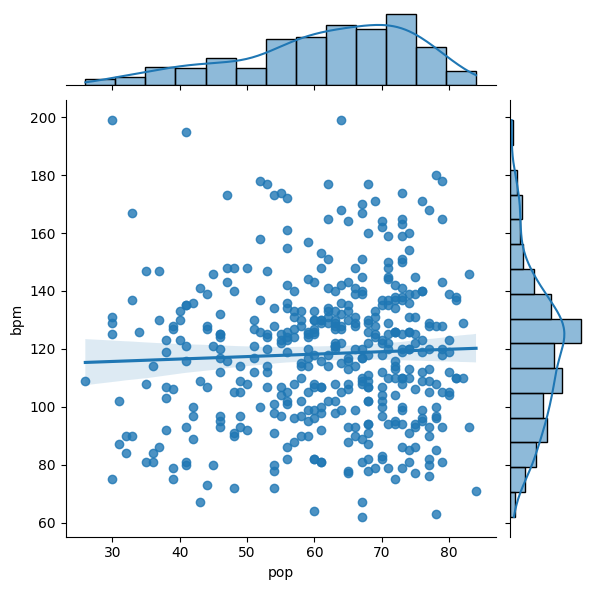

In [315]:
# Exploratory Data Analysis(EDA)
# 1)pop vs bpm
sns.jointplot(x='pop',y='bpm',data=trainDataClean,kind="reg")

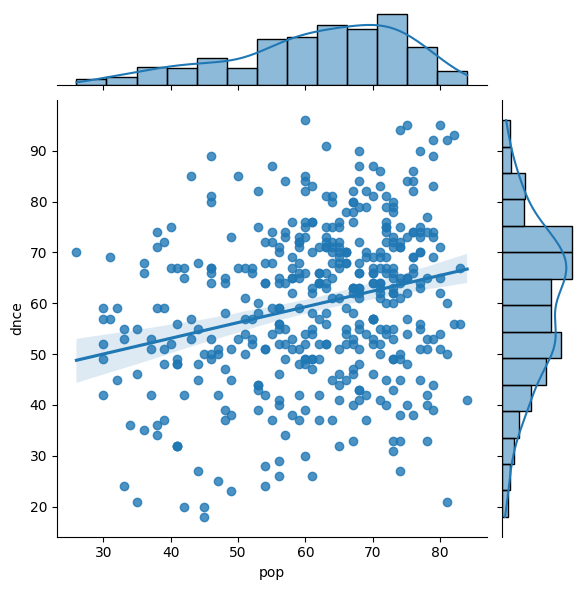

In [316]:
# 2)dnce vs pop
sns.jointplot(x='pop',y='dnce',data=trainDataClean,kind="reg")

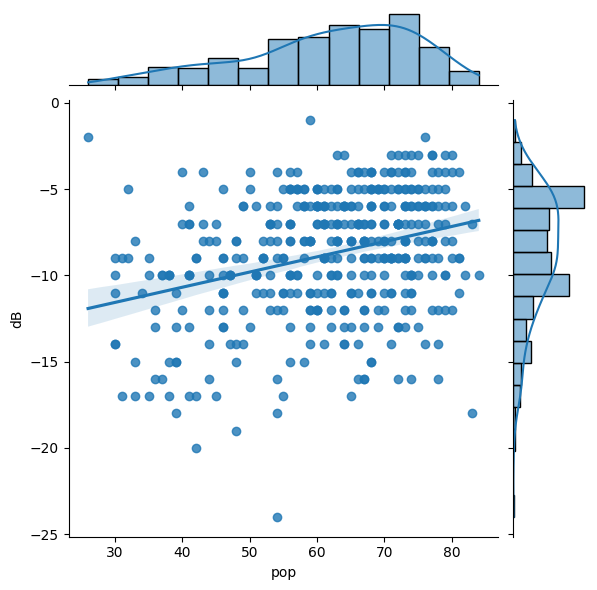

In [317]:
# 3)dB vs pop
sns.jointplot(x='pop',y='dB',data=trainDataClean,kind="reg")

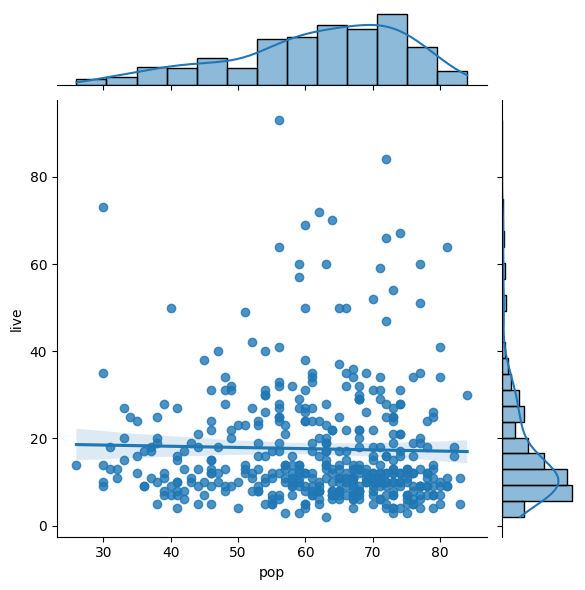

In [318]:
# 4)live vs pop
sns.jointplot(x='pop',y='live',data=trainDataClean,kind="reg")

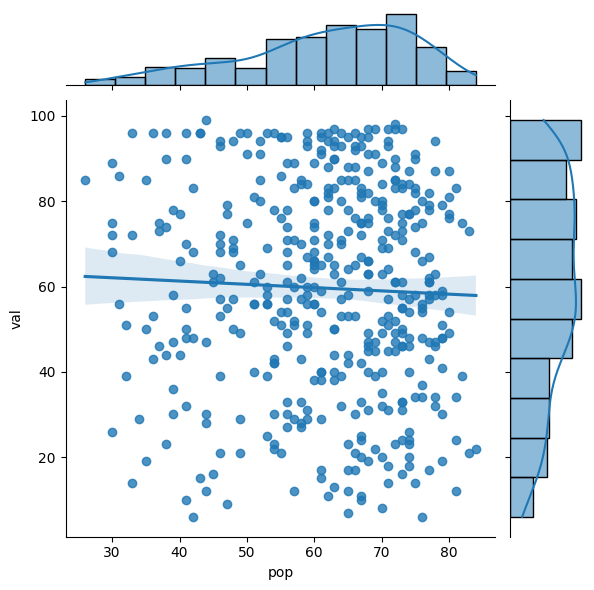

In [319]:
# 5)val vs pop
sns.jointplot(x='pop',y='val',data=trainDataClean,kind="reg")

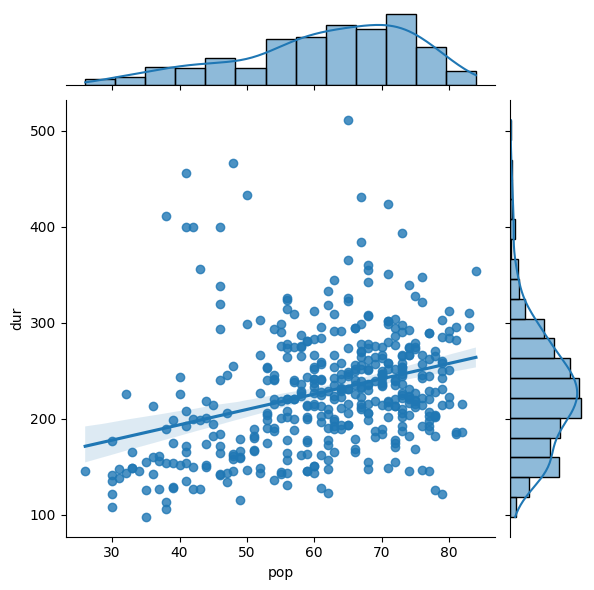

In [320]:
# 6)dur vs pop
sns.jointplot(x='pop',y='dur',data=trainDataClean,kind="reg")

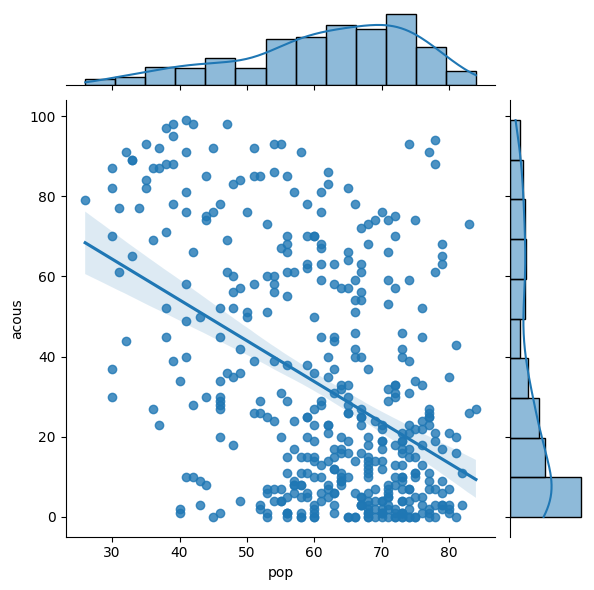

In [321]:
# 7)acous vs pop
sns.jointplot(x='pop',y='acous',data=trainDataClean,kind="reg")

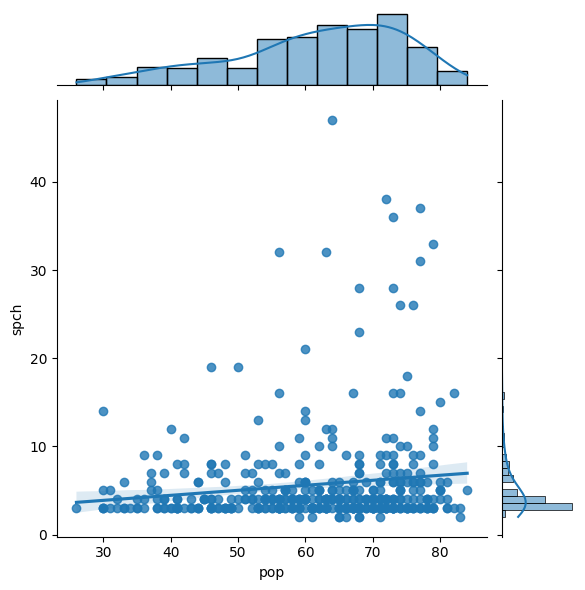

In [322]:
# 8)spch vs pop
sns.jointplot(x='pop',y='spch',data=trainDataClean,kind="reg")

In [323]:
# seperated list - train data

y = trainDataClean["pop"]
x = trainDataClean.drop(columns=["top genre","Id","artist","title","year","pop"])
dfX = pd.DataFrame(x)
stdScaler = StandardScaler()
xScaled = stdScaler.fit_transform(x)

# for polynomial 
polyFeat = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeat.fit_transform(x)
xPolyScaled = stdScaler.fit_transform(xPoly)

# for first training - scaled
xTrain, xTrainTest, yTrain, yTrainTest = train_test_split(xScaled, y, test_size=0.25, random_state=42)


# for first training - scaled poly
xTrainPoly, xTrainPolyTest, yTrainPoly, yTrainPolyTest = train_test_split(xPolyScaled, y, test_size=0.25, random_state=42)




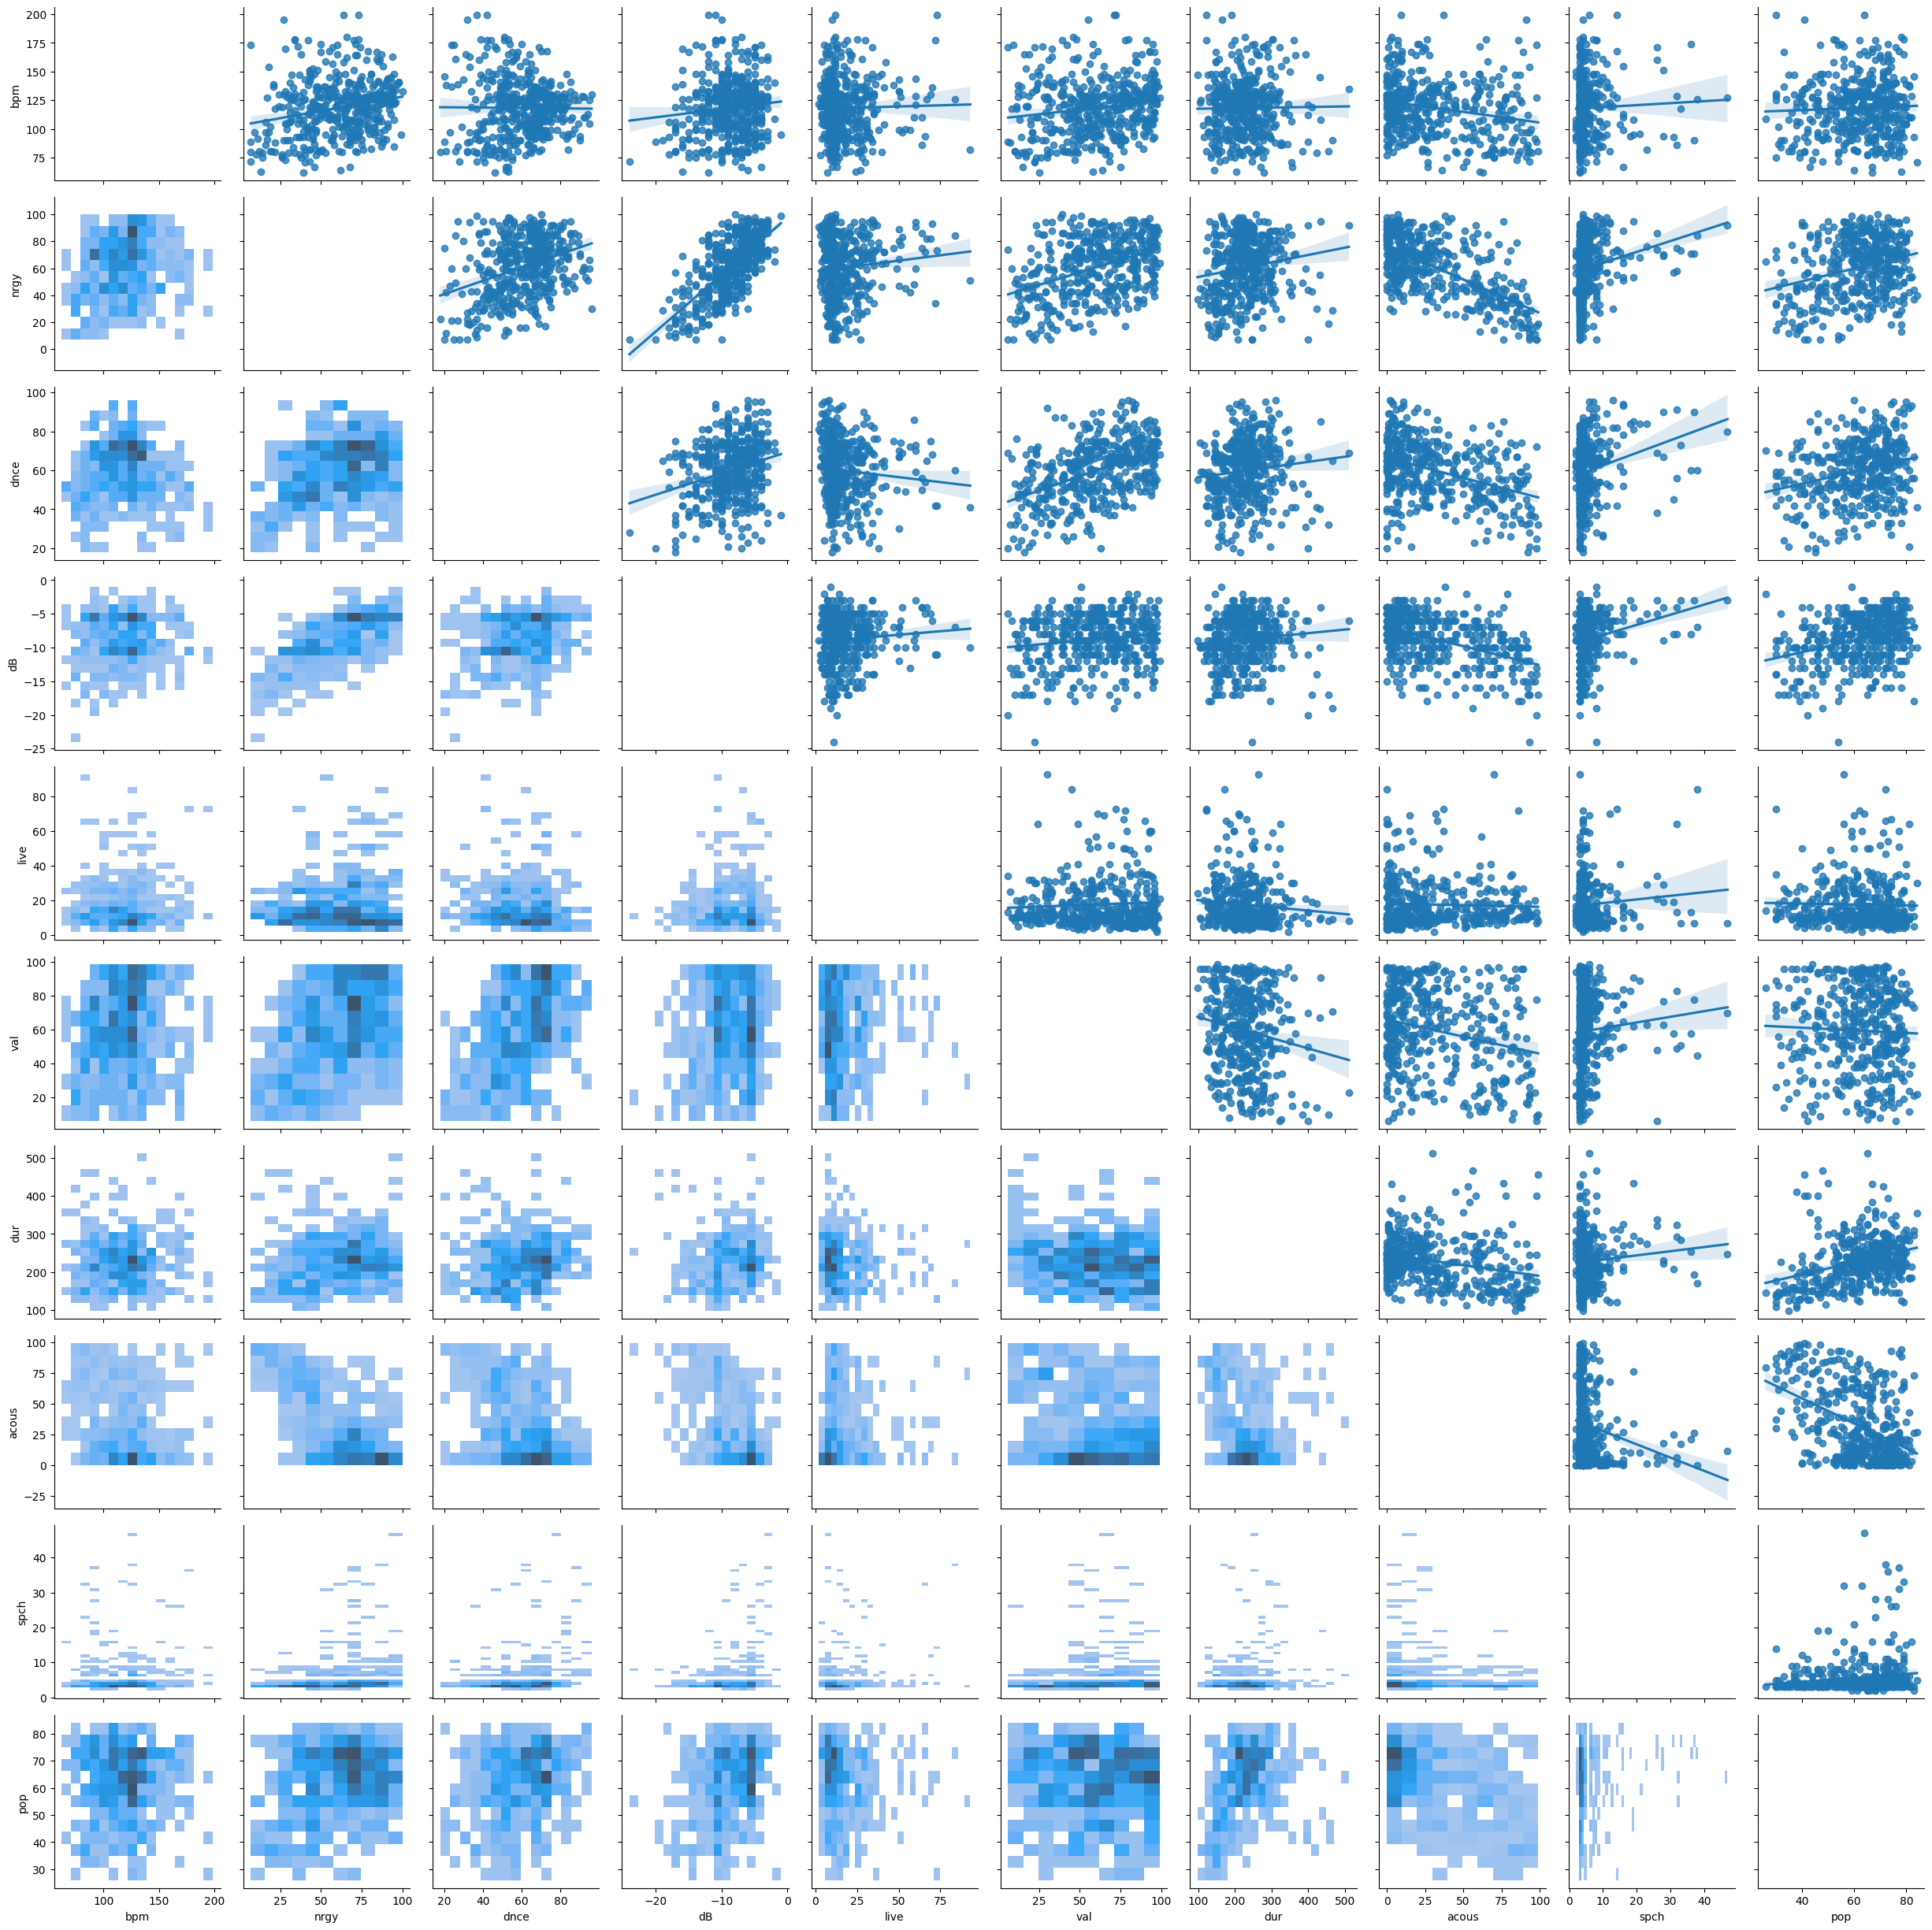

In [324]:
g = sns.PairGrid(trainDataClean.drop(columns=["top genre","Id","artist","title","year"]))

g.map_upper(sns.regplot)
g.map_lower(sns.histplot)

In [325]:
# seperate list - test data
xTest = testDataClean.drop(columns=["top genre","Id","artist","title","year","pop"])
yTest = testDataClean["pop"]

stdScaler = StandardScaler()
xScaledTest = stdScaler.fit_transform(xTest)

polyFeat = PolynomialFeatures(degree=2, include_bias=False)
xPolyScaledTest = polyFeat.fit_transform(xTest)
xPolyScaledTest = stdScaler.fit_transform(xPolyScaledTest)

In [326]:
# 1)Decision Tree Regression
# scaled x is not applied for this sample as decision tree do not require scaling
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=5) # explore min_samples = e.g. put to 1 to see what happens
tree.fit(x,y)
predTreeTrain = tree.predict(x) # Check fit
linearMse = mean_squared_error(y, predTreeTrain)
linearRmse = np.sqrt(linearMse)
print("Tree Rmse:",linearRmse)
# Check on test set
predTreeTest = tree.predict(xTest) # Check fitpredTreeTrain
print(predTreeTest)
np.savetxt("my_data_tree.csv", predTreeTest, delimiter=",", 
           header="pop", comments="")

linearMse = mean_squared_error(yTest, predTreeTest)
linearRmse = np.sqrt(linearMse)
print("test linearRmse",linearRmse)

Tree Rmse: 6.867438978769967
[73.75       71.16666667 53.66666667 51.375      68.         72.4
 53.66666667 45.2        71.16666667 62.25       70.66666667 61.28571429
 70.66666667 75.         73.75       55.16666667 63.         68.4
 65.71428571 65.83333333 39.2        69.25       68.         45.2
 58.16666667 68.6        60.5        47.         36.33333333 76.66666667
 73.4        52.4        70.875      71.16666667 64.33333333 73.75
 60.66666667 53.66666667 68.4        63.6        75.2        75.2
 61.28571429 36.33333333 75.         66.         62.25       47.
 68.8        64.28571429 46.2        75.2        58.16666667 35.125
 61.57142857 69.25       72.4        45.4        68.42857143 38.8
 55.16666667 71.16666667 76.66666667 71.42857143 68.42857143 68.4
 78.4        53.66666667 60.66666667 47.         76.66666667 61.57142857
 47.875      63.6        61.57142857 71.42857143 76.66666667 71.28571429
 78.4        47.875      76.66666667 70.83333333 40.83333333 73.16666667
 68.      

In [327]:
# 2) poly SVR
# instead of scaled x , we use scaled polynomial featured x (degree=2)as we are going to apply poly SVR(degree=2))
from sklearn.svm import SVR
svrPoly = SVR(kernel="poly", degree=2, C=100, epsilon=0.05, gamma="scale")
svrPoly.fit(xTrainPoly,yTrainPoly)
ypred = svrPoly.predict(xTrainPolyTest)
linearMse = mean_squared_error(yTrainPolyTest, ypred)
linearRmse = np.sqrt(linearMse)
print("linearRmse",linearRmse)


# Check on test set
svrPoly.fit(xPolyScaled,y)
predSVRPolyTest = svrPoly.predict(xPolyScaledTest) # Check fitpredTreeTrain
print(predSVRPolyTest)
np.savetxt("my_data_SVR.csv", predSVRPolyTest, delimiter=",", 
           header="pop", comments="")

linearMse = mean_squared_error(yTest, predSVRPolyTest)
linearRmse = np.sqrt(linearMse)
print("test linearRmse",linearRmse)

linearRmse 16.250389934982852
[ 59.75968105  68.58148478  55.60830956  57.70048725  58.4623228
  68.80116002  57.26469244  40.73753657  66.129245    68.06990739
  52.20702399  70.79409118  44.14811735  64.23931605  69.26766693
  63.93529432  60.12140385  63.86188762  81.38591981  63.50818053
  66.93686579  62.73279329  48.32935357  57.97807035  44.60830124
  68.59520461  59.05351425  59.62202216  52.37030593  87.69662702
  74.39336174  65.06514966  71.08680569  68.50163793  68.81620888
  84.3847866   63.51431968  51.30291109  61.3411527   65.76607735
  68.83230219  67.48442901  71.3118627   58.82375552  67.22982957
  58.4992562   60.52770811  65.94797166  67.08095543  63.50577828
  58.27677291  68.78168303  66.17149387  52.39123062  69.95638469
  65.37380534  66.4660498   50.9951361   70.18178671  45.36902933
  63.88450777  68.06246999  67.84549325  64.43187898  68.42745265
  51.76822378  78.66318881  48.49233735  64.76807392  60.73861455
  64.5273969   52.22971067  55.85857061  69.111

In [328]:
# 3) bagging with polySVR
from sklearn.ensemble import BaggingRegressor

baggedPolySVRReg = BaggingRegressor(base_estimator=SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale"),n_estimators=10, random_state=0,bootstrap=True, n_jobs=-1)
baggedPolySVRReg.fit(xTrainPoly,yTrainPoly)
ypred = baggedPolySVRReg.predict(xTrainPolyTest)
linearMse = mean_squared_error(yTrainPolyTest, ypred)
linearRmse = np.sqrt(linearMse)
print("linearRmse",linearRmse)

# Check on test set
baggedPolySVRReg.fit(xPolyScaled,y)
predbaggedSVRPolyTest = baggedPolySVRReg.predict(xPolyScaledTest)     
print(predbaggedSVRPolyTest)
np.savetxt("my_data_bagged_SVR.csv", predbaggedSVRPolyTest, delimiter=",", 
           header="pop", comments="")

linearMse = mean_squared_error(yTest, predbaggedSVRPolyTest)
linearRmse = np.sqrt(linearMse)
print("test linearRmse",linearRmse)

linearRmse 14.621390724805446
[ 60.25399492  66.71791868  62.2964307   58.52476399  59.59414735
  69.19161208  63.00620524  38.71670846  66.76070683  66.689696
  51.91792547  68.72078012  46.56242871  65.32873427  67.46202716
  64.67968322  61.2437353   63.24991695  82.59766876  66.14310326
  64.80183962  62.41581467  47.46715854  53.27828396  73.4187567
  67.32935236  60.35916162  61.30526692  49.58871725  84.0892337
  69.80573594  58.53081681  73.24923431  69.80764221  69.64200631
  87.55269375  62.06728531  55.42975379  61.40062696  64.61256261
  69.44490477  62.68702306  73.51693454  56.81932016  69.02357145
  62.44093733  59.25743014  67.22074279  64.17030806  64.67636749
  56.85021654  69.43102803  66.72738249  48.4446086   66.2846039
  63.00453983  67.36365137  50.2161053   72.88963005  39.57824863
  62.99659259  69.74260016  69.91265206  65.49947014  67.67487221
  51.25604467  71.39720893  50.15765135  64.93080949  63.35972208
  69.6325253   51.56252831  53.9181018   67.3922065

In [333]:
# 3) bagging with randomForest

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

baggedRFReg = BaggingRegressor(base_estimator=RandomForestRegressor(max_leaf_nodes=50, n_jobs=-1),n_estimators=10, random_state=0,bootstrap=True, n_jobs=-1)
baggedRFReg.fit(xTrain,yTrain)
ypred = baggedRFReg.predict(xTrainTest)
linearMse = mean_squared_error(yTrainTest, ypred)
linearRmse = np.sqrt(linearMse)
print("linearRmse",linearRmse)

# Check on test set
baggedRFReg.fit(xPolyScaled,y)
predbaggedSVRPolyTest = baggedRFReg.predict(xPolyScaledTest)     
print(predbaggedSVRPolyTest)
np.savetxt("my_data_bagged_RF_3.csv", predbaggedSVRPolyTest, delimiter=",", 
           header="pop", comments="")

linearMse = mean_squared_error(yTest, predbaggedSVRPolyTest)
linearRmse = np.sqrt(linearMse)
print("test linearRmse",linearRmse)

linearRmse 10.14276931204685
[68.61254506 63.03646298 58.0043459  61.66844881 53.37275508 66.31419255
 59.26630027 41.58567206 66.84429561 66.46475787 60.0730557  67.84412748
 56.15716673 64.5761196  66.21080145 64.90406416 60.65914067 64.29934132
 65.9237065  67.72530292 56.95613778 56.67700224 51.36079436 48.73991019
 53.63029435 66.47521287 62.56483737 57.36617869 49.536426   71.37261229
 68.10843887 54.21115846 67.04138633 70.40625226 66.38662469 71.87723903
 63.94574523 58.72561385 62.90458525 65.99010718 68.27205415 62.74215309
 63.99839045 47.72254051 62.70223156 59.85175393 65.50351141 59.58249367
 62.36226438 63.2702285  51.88673376 65.9776114  60.00828382 49.21256679
 62.19155366 59.35737751 67.27596741 51.85126744 70.32325127 47.54680523
 61.22999849 65.51845024 66.42413218 64.76425828 68.74047933 61.0210301
 65.88143801 58.44696706 62.3019453  56.75625497 67.15898962 55.50947942
 56.9095321  63.7876684  58.88565048 67.92569937 68.79305211 64.94711459
 62.26601604 57.6749468

In [330]:
rf = RandomForestRegressor(max_leaf_nodes=50, n_jobs=-1)
rf.fit(xScaled,y)
rf.feature_importances_

array([0.07082283, 0.08198418, 0.07852334, 0.07997393, 0.04923143,
       0.07266414, 0.38223649, 0.14410485, 0.0404588 ])

In [332]:
# 4) Gradient Boosting Regressor
# train data
from sklearn.ensemble import GradientBoostingRegressor
gradBoostReg = GradientBoostingRegressor(random_state=0)
gradBoostReg.fit(xTrain,yTrain)
ypred = gradBoostReg.predict(xTrainTest)
linearMse = mean_squared_error(yTrainTest, ypred)
linearRmse = np.sqrt(linearMse)
print("linearRmse",linearRmse)

# test data
gradBoostReg.fit(xScaled,y)
predGradBoostReg = gradBoostReg.predict(xScaledTest)     
print(predGradBoostReg)
np.savetxt("my_data_grad_boost.csv", predGradBoostReg, delimiter=",", 
           header="pop", comments="")
        
linearMse = mean_squared_error(yTest, predGradBoostReg)
linearRmse = np.sqrt(linearMse)
print("test linearRmse",linearRmse)

linearRmse 10.167159786817074
[69.05359728 71.49209569 55.07056401 62.03916846 53.92730577 67.78291898
 56.19613324 38.69105538 66.70875812 55.73788255 60.67791522 61.79785878
 63.66232802 62.97759441 61.36940458 63.75980759 63.63884265 67.69479599
 68.92600999 68.09917154 54.82989931 56.76008557 55.16360922 45.73669156
 57.63331959 69.48002077 61.25781552 47.28091307 46.42831226 71.34000672
 68.63002865 59.66992738 69.60927642 66.76030551 66.84115951 74.5322278
 64.67292514 56.03084236 63.5801233  67.67365909 64.54128507 60.86716584
 65.68505492 46.57677161 66.16743379 62.28534403 63.82396236 59.03578427
 56.66593463 63.30809119 54.31528536 64.97363367 62.44183105 42.72443719
 64.03210095 59.78131772 68.1001127  56.86216592 68.25175222 44.86775421
 64.93538023 66.97630797 65.83411746 70.07500435 69.45221152 69.97097928
 69.18089311 57.01760014 64.63824191 64.77594345 69.23938655 66.26526951
 57.72663773 62.77609928 56.89845761 67.46229114 73.22541639 66.26186005
 59.26620093 56.747689